# Class 5 - 20240731

In [2]:
# pip install wordcloud plottable matplotlib-venn


In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

Load Data

In [5]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Basic Plot

<Axes: xlabel='total_bill', ylabel='tip'>

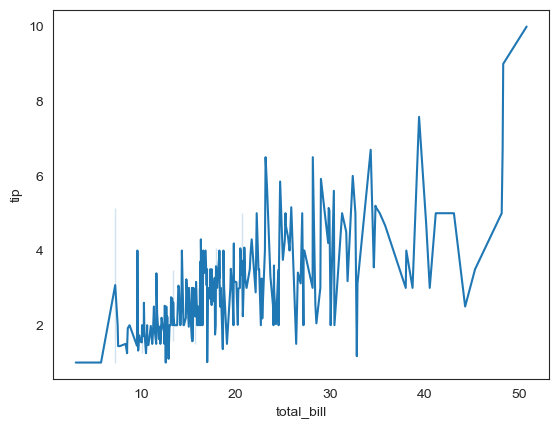

In [7]:
sns.set_style('white')
sns.lineplot(data= tips,
             x='total_bill',
             y = 'tip'            
             )
# values in the total_bill are not unique, sns will make a mean when plotting

Add title and axis labels

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

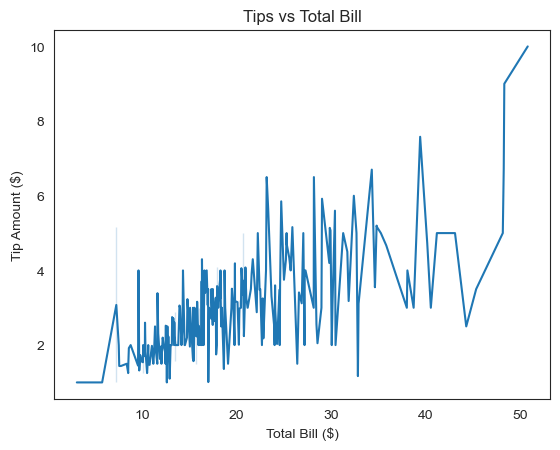

In [11]:
tipgraph = sns.lineplot(data = tips,
                        x ='total_bill',
                        y = 'tip'
                        )
tipgraph.set(
    title ='Tips vs Total Bill',
    xlabel ='Total Bill ($)',
    ylabel ='Tip Amount ($)'
)

Modify the plot 

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

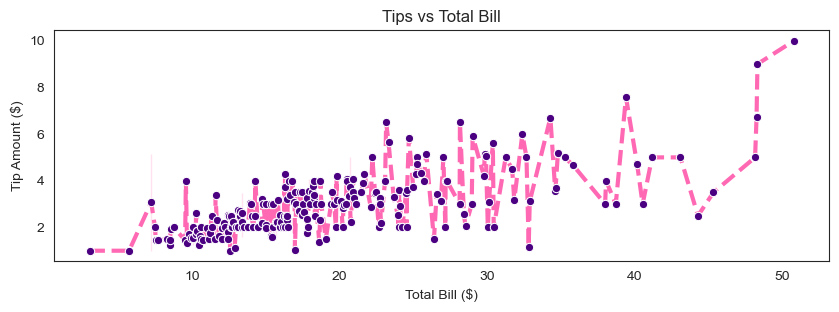

In [12]:
fig = plt.subplots(figsize = (10,3))
tipgraph = sns.lineplot(data = tips,
                        x ='total_bill',
                        y ='tip',
                        color ='hotpink',
                        linestyle ='--',
                        linewidth =3,
                        marker ='o',
                        markerfacecolor ='indigo'
                        
                        )
tipgraph.set(
    title ='Tips vs Total Bill',
    xlabel ='Total Bill ($)',
    ylabel ='Tip Amount ($)'
)

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

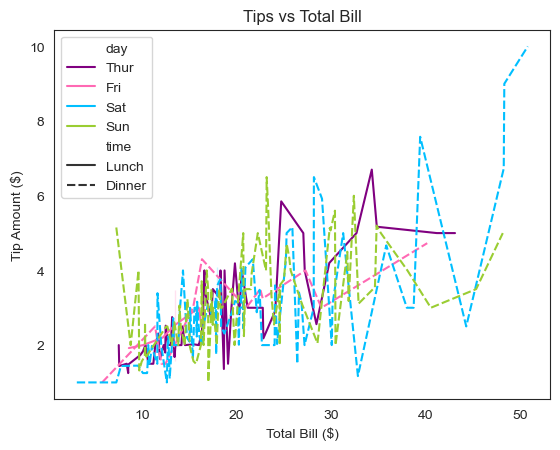

In [14]:
tipgraph = sns.lineplot(data = tips,
                        x ='total_bill',
                        y ='tip',
                        style ='time',
                        hue ='day',
                        palette= ['purple',
                                  'hotpink',
                                  'deepskyblue',
                                  'yellowgreen'
                                  ]
                        
                        )
tipgraph.set(
    title ='Tips vs Total Bill',
    xlabel ='Total Bill ($)',
    ylabel ='Tip Amount ($)'
)

Add multiple variables

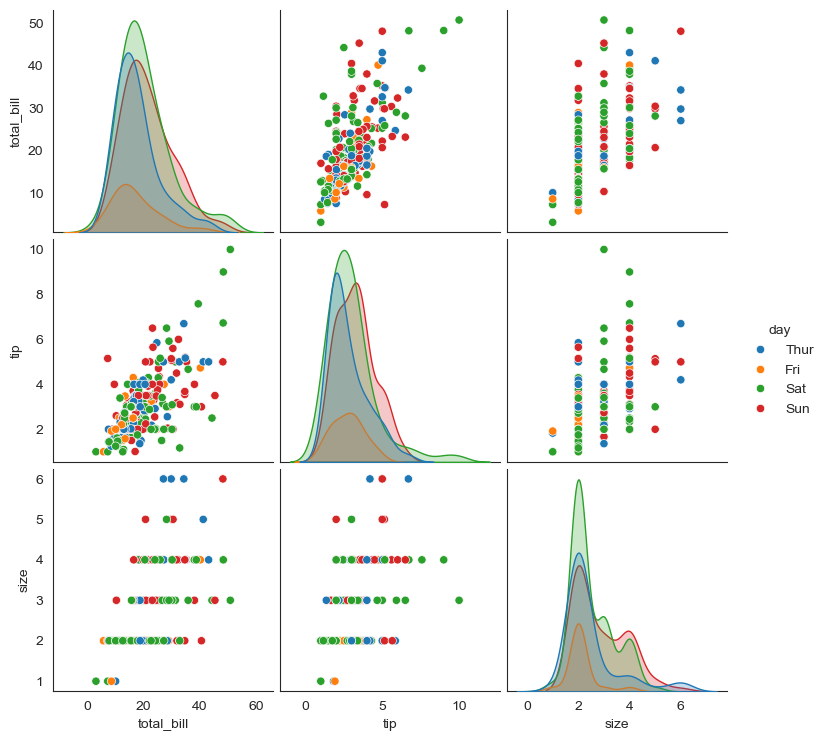

In [15]:
# pairplot compares numerical columns and shows univariant relationship
sns.pairplot(data = tips,
             hue = 'day')

Multivariant Relationship

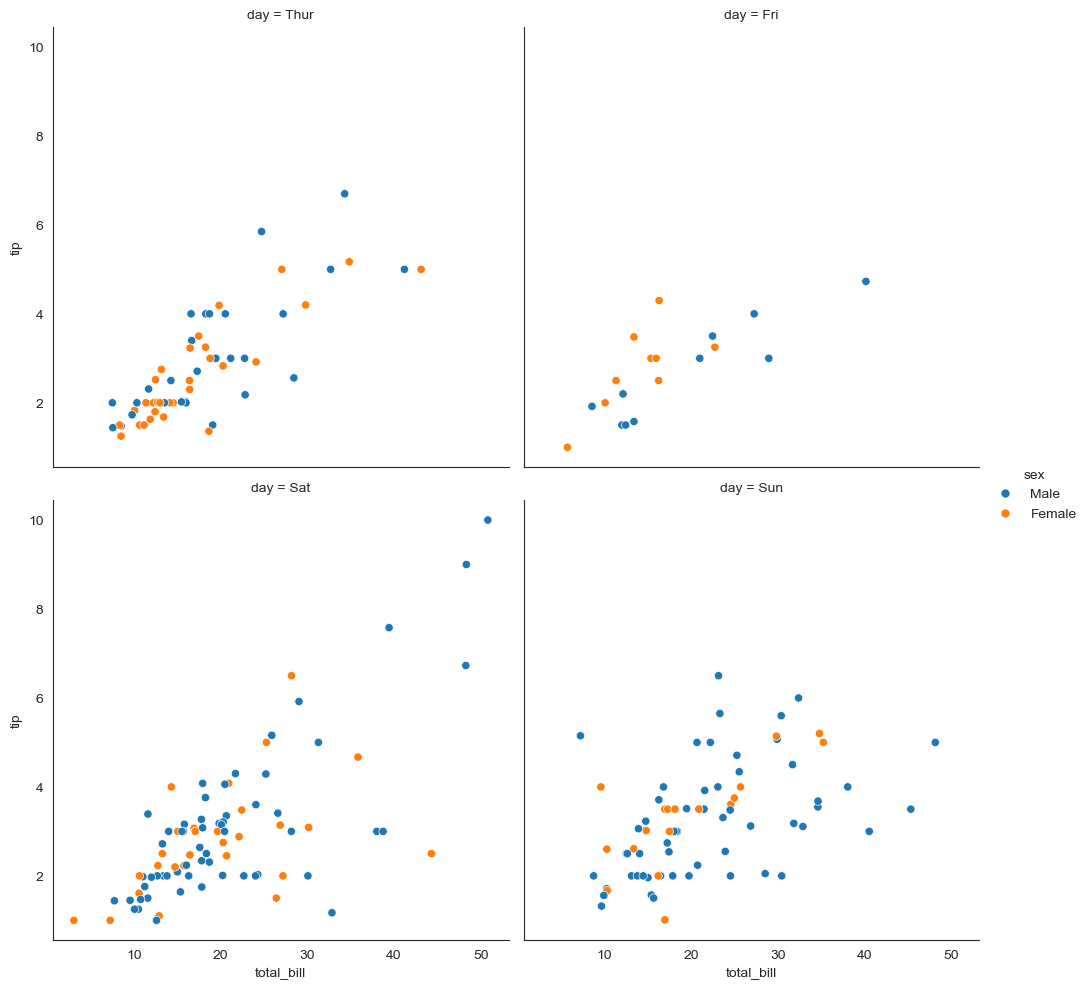

In [16]:
sns.relplot(data= tips,
            x ='total_bill',
            y ='tip',
            hue ='sex', 
            col= 'day',
            kind = 'scatter',
            col_wrap=2)

Viz 1 - Mean of Student Ratings by Actual and Perceived Instructor Gender 
Viz 2 - http://benschmidt.org/profGender/#

Compare the above 2 plots.

Defining static vs. dynamic data visualization

spacial elements and retinal elements

Interactive plots by plotly

In [19]:
import plotly.graph_objects as go
x1= np.array(['Luffy','Zoro','Nami','Usopp','Sanji'])
y1= np.array([110,180,240,99,220])

In [21]:
graph = go.Figure()

In [23]:

graph.add_trace(go.Bar(x=x1,y=y1))

In [24]:
graph.update_layout(title ='Pirate Socres',
                    xaxis_title ='Prirates',
                    yaxis_title = 'Score')

In [26]:
graph = go.Figure()
graph.add_trace(go.Scatter(
    x = x1,
    y =y1,
    mode ='markers',
    marker = dict(
        size =15,
        color = 'hotpink',
        opacity =1,
        line = dict(width =5, color ='purple')
    )
))
graph.update_layout(
    title = 'Interactive Prirate Plot',
    yaxis_title = 'Scores',
    xaxis_title ='Pirates',
    width = 500,
    height =500
)

Save the plot  eg., fig.write_html()

Why use code for qualitative viz?

https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv

In [27]:
from wordcloud import WordCloud

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
                 on_bad_lines='skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(-0.5, 399.5, 199.5, -0.5)

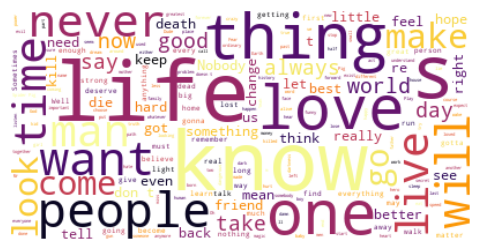

In [31]:
text = " ".join(each for each in df.quote)
wordcloud = WordCloud(background_color= 'white', colormap='inferno').generate(text)

fig, ax = plt.subplots(figsize = (7,3))
ax.imshow(wordcloud,
          interpolation='bilinear')

ax.axis('off')

Making venn plot

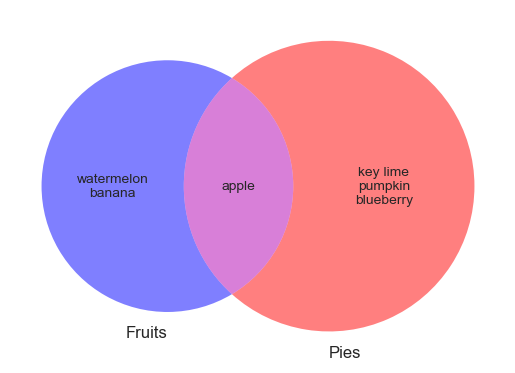

In [38]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
A =set(["apple","banana","watermelon"])
B = set(["pumpkin","blueberry","apple","key lime"])
diagram = venn2([A,B],
                set_labels =('Fruits','Pies'),
                set_colors =('blue','red'),
                alpha =0.5               

)
diagram.get_label_by_id("10").set_text("\n".join(A-B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B-A))